# Import
First we import the necessary libraries and define functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import gridspec
from gudhi import RipsComplex
from gudhi import AlphaComplex
from gudhi.representations import Entropy
from gudhi.representations import DiagramSelector
import gudhi as gd
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.metrics import pairwise_distances
import math
import functions as fu
from scipy.stats import pearsonr,spearmanr

# Load the data. 

It corresponds to 100 point clouds with a time step of 0.1 seconds between each and 20 robots. We have the location of each robot and his angle of view. This data has been extracted from an experiment run of Navground (the software developed by SUPSI in WP3). https://idsia-robotics.github.io/navground/_build/html/index.html

In [2]:
ps = np.load("Robots.npy")
print(ps.shape) # 20 point clound with 30 robots and 3 features(x position, y position, angle view)
instantes=ps.shape[0]
n_robots=ps.shape[1]
radio=2
anguloVision=2*np.pi
minX,maxX = np.min(ps[:,:,0]), np.max(ps[:,:,0])
minY,maxY = np.min(ps[:,:,1]), np.max(ps[:,:,1])

(100, 20, 3)


We need to get the topology right. The topology of the point clouds can be inferred from several filterings, so we will use a fast and sparse (2D) one. First, we need to get an idea of the maximum filtering value to use, which we will approximate with the largest pairwise distance of the point clouds.

In [3]:
ds = [pairwise_distances(X).flatten() for X in ps[:,:,:2]]
maxd = np.max(np.concatenate(ds))
print(maxd)

10.017


Now we can calculate the topological entropy of dimension 0 for each point cloud, for this we first calculate the persistence diagram, limit the bars that go to infinity and calculate the entropy. Finally we can plot the time series of the topology of how robots are located in each time and how they are moving.

Keep in mind that the first instant will have a very large entropy, or one of the largest, since by default Navground gives them very dispersed at the beginning of the experiment.

P.S: We have created the time series plot in matplotlib and plotly to to know the instants of time that are of interest to study.

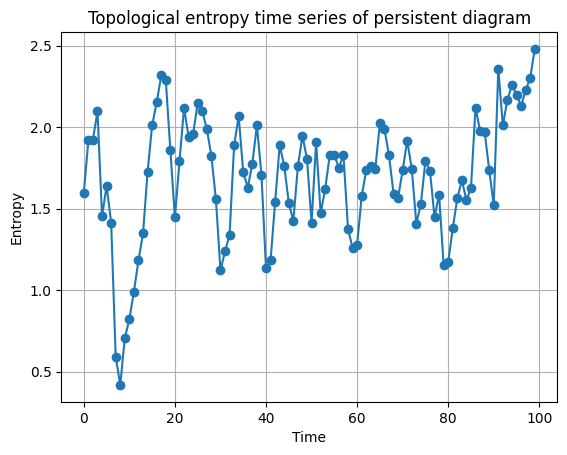

In [4]:
entropias=[]
for i in range(instantes):
    nube_puntos=ps[i,:,:2]
    persistence = fu.calculaDiagramaPersistencia(nube_puntos,0,"alpha")
    persistenciaL = fu.limitaDiagrama(persistence,maxd,remove=True)
    entropias.append(fu.calculaEntropia(persistenciaL))
    
fu.dibujaEntropyTimeSerie(entropias)
fu.dibujaEntropyTimeSerieInteractive(entropias)

It would be interesting to know what it means to have a peak of high/low entropy(for example, the time with biggest entropy: 35; and with the lowest entropy: 57) in terms of this time series, as well as the meaning of little or much entropy differences between two consecutive time instants(for example times 92,93 and 94 marked in red.​

# We compare the time instants of highest and lowest topological entropy.

In [5]:
sorted_indices = np.argsort(entropias)
indices_menores = sorted_indices[:9]
indices_mayores = sorted_indices[-9:]

Point clouds with lower entropy

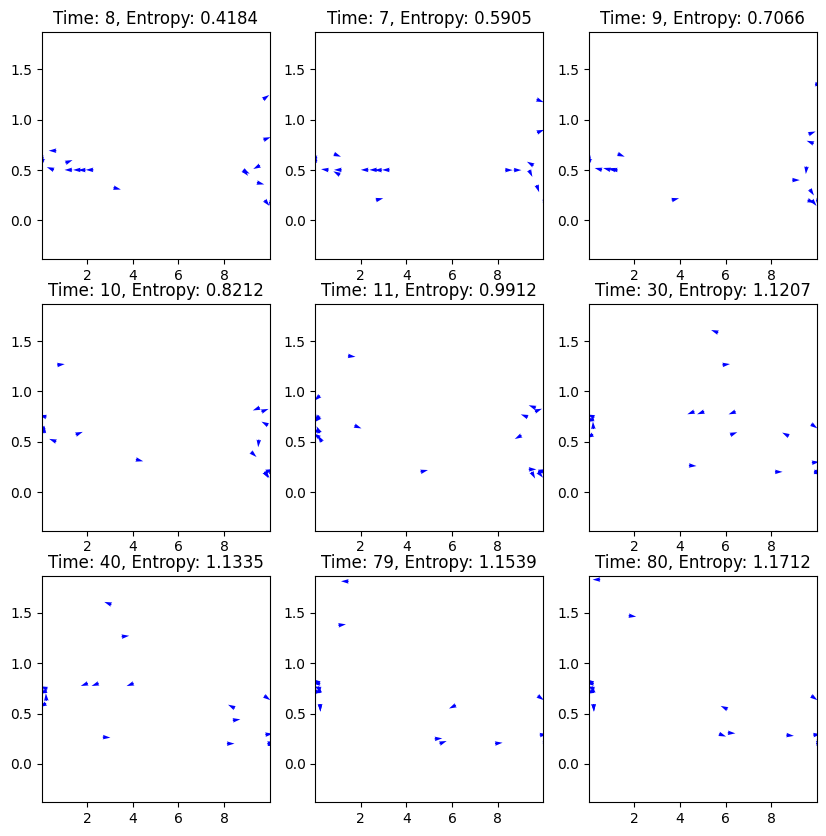

In [6]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10)) 
for i in range(3):
    for j in range(3):
        instante = indices_menores[3*i+j]
        axs[i,j].quiver(ps[instante][:,0], ps[instante][:,1], np.cos(ps[instante][:,2]), np.sin(ps[instante][:,2]), color="blue",scale=30,width=0.01, headwidth=3, headlength=5)
        axs[i,j].set_title(f"Time: {instante}, Entropy: {entropias[instante]}")
for ax in axs.flat:
    ax.set_xlim([minX,maxX])
    ax.set_ylim([minY,maxY])
plt.show()

Point clouds with bigger entropy

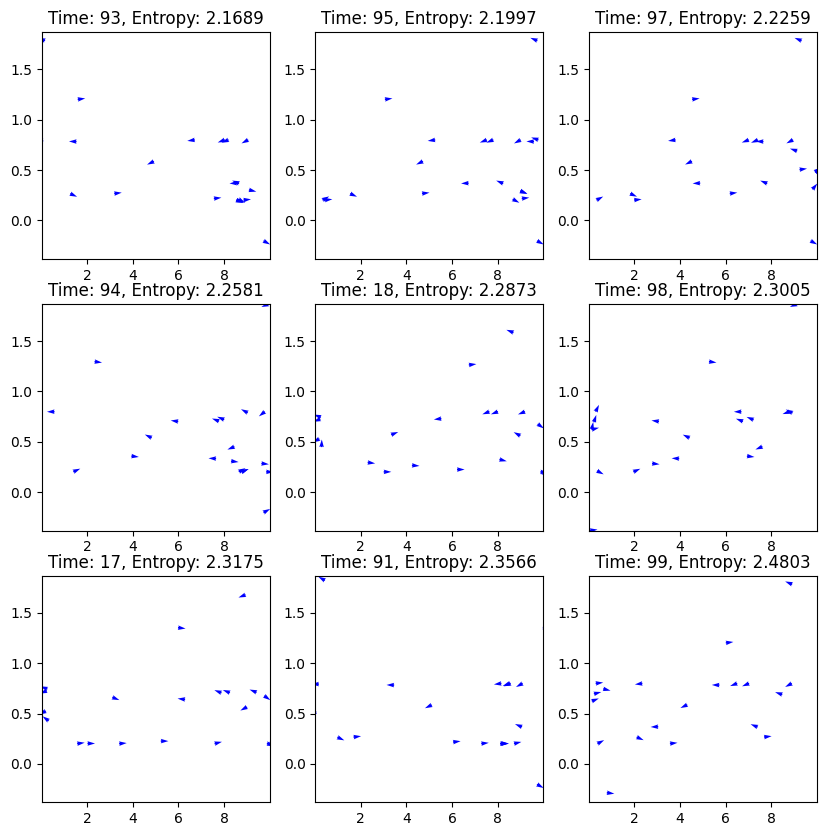

In [7]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10)) 
for i in range(3):
    for j in range(3):
        instante = indices_mayores[3*i+j]
        axs[i,j].quiver(ps[instante][:,0], ps[instante][:,1], np.cos(ps[instante][:,2]), np.sin(ps[instante][:,2]), color="blue", scale=30,width=0.01, headwidth=3, headlength=5)
        axs[i,j].set_title(f"Time: {instante}, Entropy: {entropias[instante]}")
for ax in axs.flat:
    ax.set_xlim([minX,maxX])
    ax.set_ylim([minY,maxY])
plt.show()

If we want to visualize the persistent barcode

In [ ]:
for i in range(9):
    fu.dibujaPersisteceBarcode(indices_menores[i])

In [ ]:
for i in range(9):
    fu.dibujaPersisteceBarcode(indices_mayores[i])

We can say that: 

- Higher entropy:
    - Intervals in the persistence barcode are more evenly distributed in length
    - Suggests greater dispersion among the robots
- Lower entropy:
    - Intervals in the persistence barcode are more uneven distributed
    - Suggests that some robots form a group

# Comparing entropy difference between two consecutive time periods

Comparing times with very slight entropy change (79 and 80):

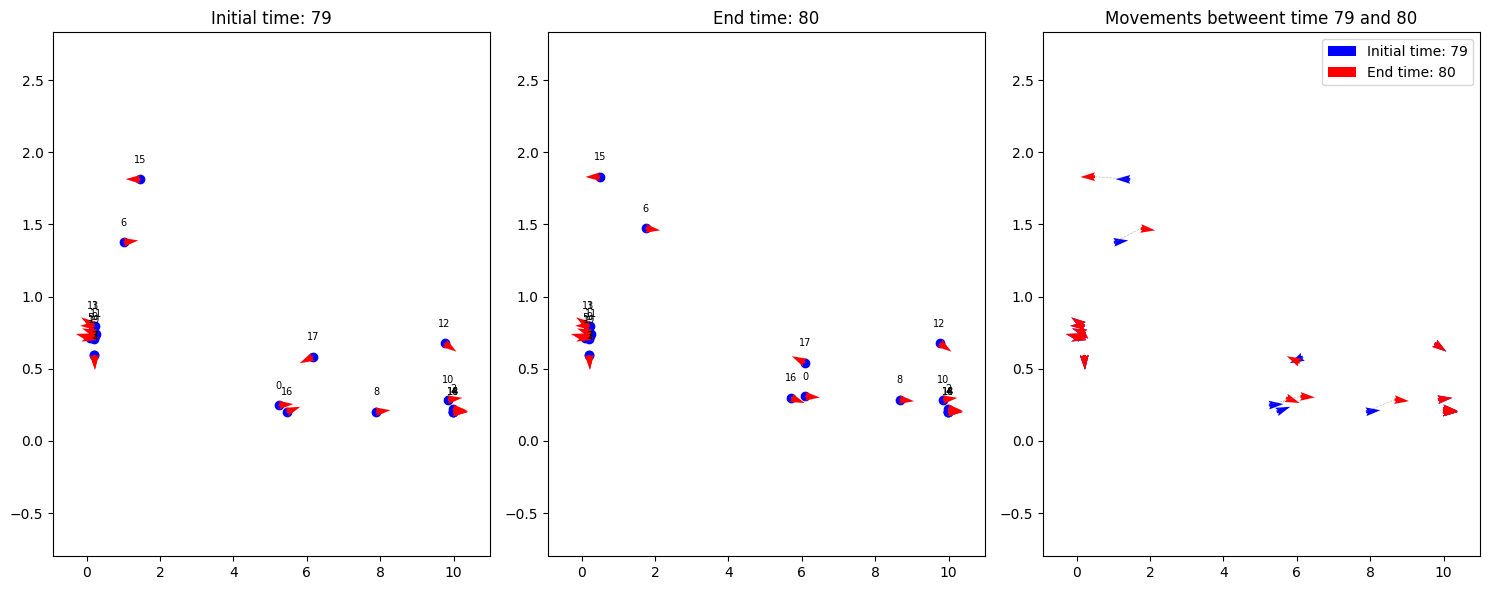

The total distance moved between the instances 79 and 80 is 3.711535655329407 with an average per robot of: 0.18557678276647036 and with a median per robot of: 0.0


In [7]:
time1=79
time2=80
fu.dibujaNubePuntos2Instantes(time1,time2)
distances=[]
for i in range(n_robots):
    x1=ps[time1,i,0]
    y1=ps[time1,i,1]
    x2=ps[time2,i,0]
    y2=ps[time2,i,1]
    distancia=fu.calculate_distance(x1,y1,x2,y2)
    distances.append(distancia)
print(f"The total distance moved between the instances {time1} and {time2} is {sum(distances)} with an average per robot of: {np.mean(distances)} and with a median per robot of: {np.median(distances)}")

Comparing times with larger entropy change (80 and 81):

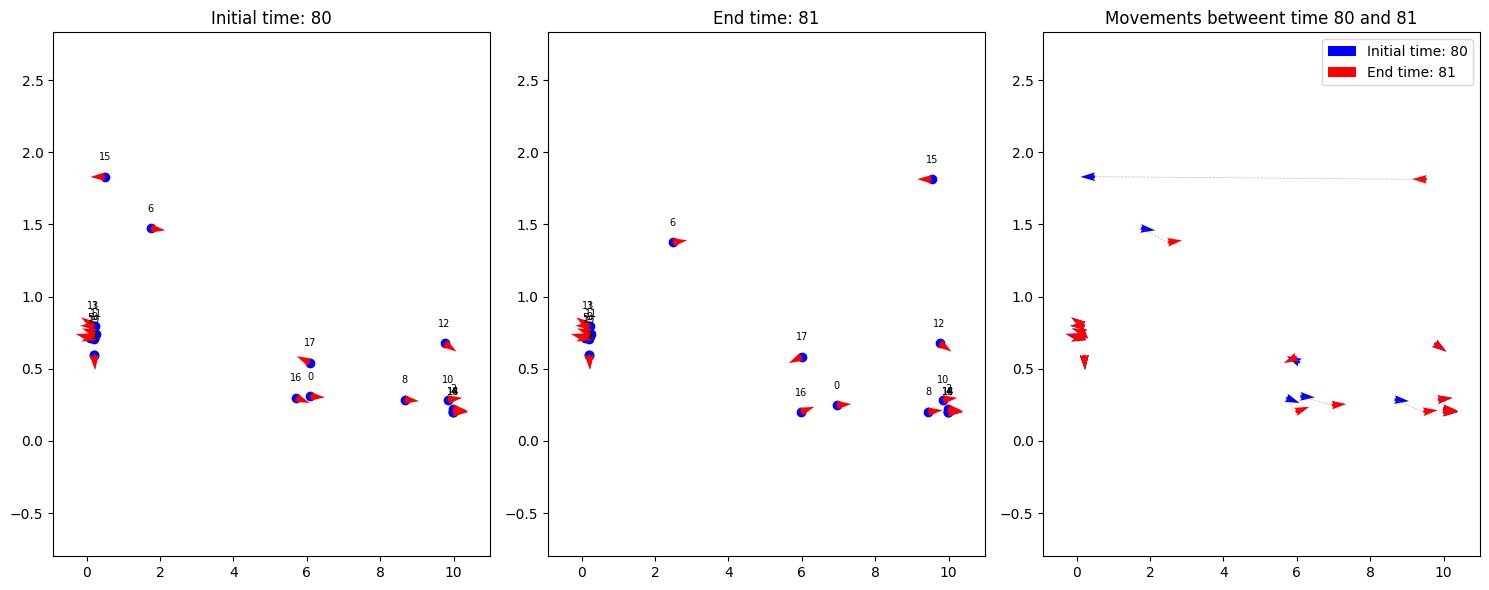

The total distance moved between the instances 80 and 81 is 11.79239853047784 with an average per robot of: 0.589619926523892 and with a median per robot of: 0.0


In [8]:
time1=80
time2=81
fu.dibujaNubePuntos2Instantes(time1,time2)
distances=[]
for i in range(n_robots):
    x1=ps[time1,i,0]
    y1=ps[time1,i,1]
    x2=ps[time2,i,0]
    y2=ps[time2,i,1]
    distancia=fu.calculate_distance(x1,y1,x2,y2)
    distances.append(distancia)
print(f"The total distance moved between the instances {time1} and {time2} is {sum(distances)} with an average per robot of: {np.mean(distances)} and with a median per robot of: {np.median(distances)}")

Another example: Low difference in entropy between times 59 and 60 and bigger difference between times 60 and 61

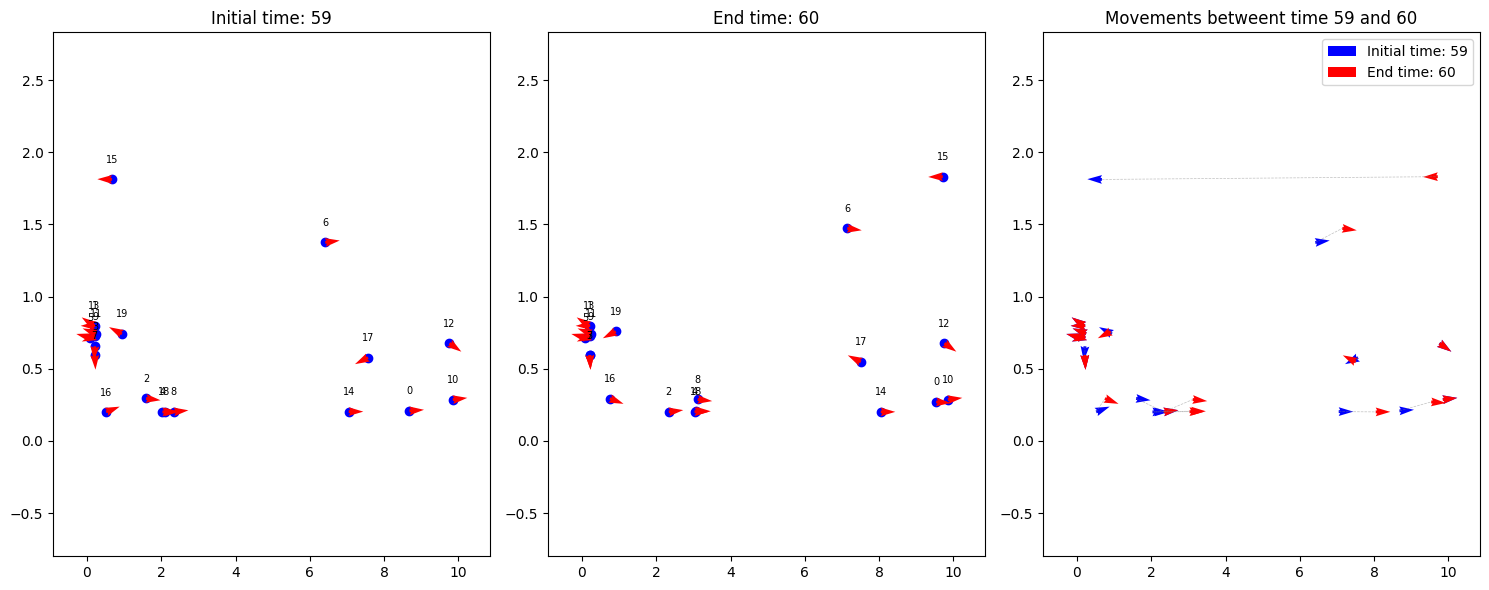

The total distance moved between the instances 59 and 60 is 15.560793393847732 with an average per robot of: 0.7780396696923867 and with a median per robot of: 0.06392544042423653


In [9]:
time1=59
time2=60
fu.dibujaNubePuntos2Instantes(time1,time2)
distances=[]
for i in range(n_robots):
    x1=ps[time1,i,0]
    y1=ps[time1,i,1]
    x2=ps[time2,i,0]
    y2=ps[time2,i,1]
    distancia=fu.calculate_distance(x1,y1,x2,y2)
    distances.append(distancia)
print(f"The total distance moved between the instances {time1} and {time2} is {sum(distances)} with an average per robot of: {np.mean(distances)} and with a median per robot of: {np.median(distances)}")

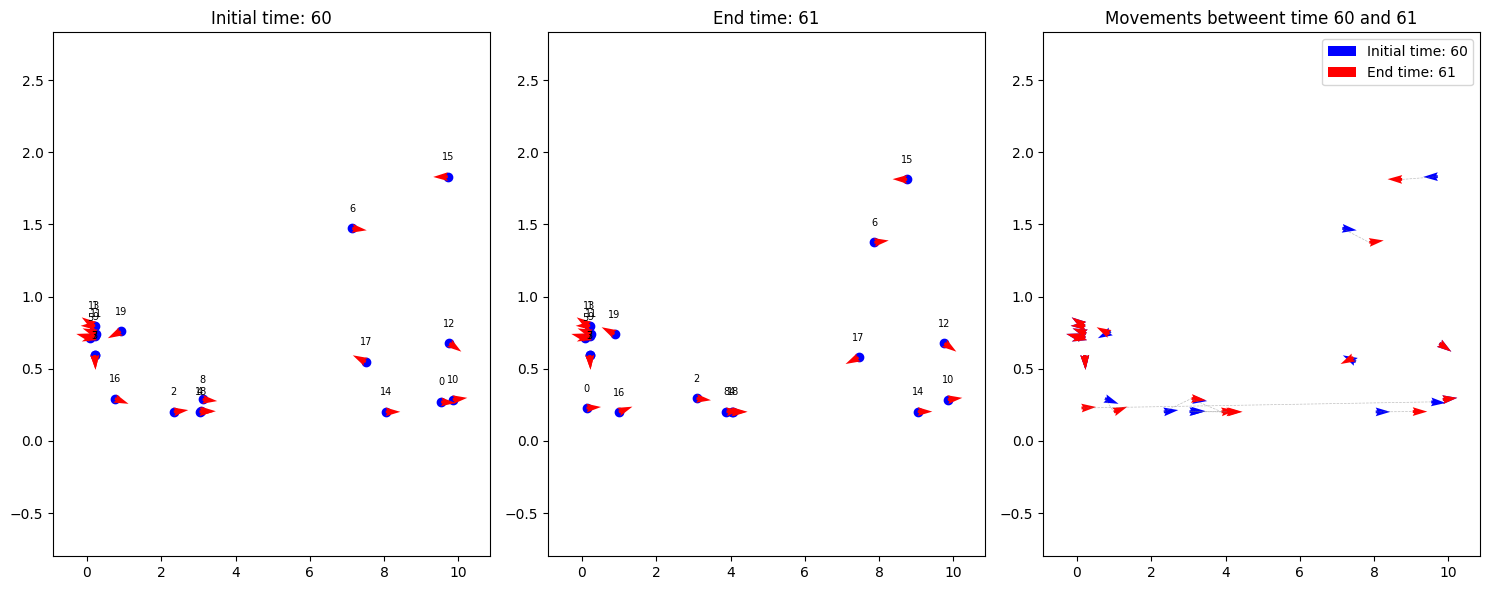

The total distance moved between the instances 60 and 61 is 15.979465362246685 with an average per robot of: 0.7989732681123342 and with a median per robot of: 0.05231543444556751


In [10]:
time1=60
time2=61
fu.dibujaNubePuntos2Instantes(time1,time2)
distances=[]
for i in range(n_robots):
    x1=ps[time1,i,0]
    y1=ps[time1,i,1]
    x2=ps[time2,i,0]
    y2=ps[time2,i,1]
    distancia=fu.calculate_distance(x1,y1,x2,y2)
    distances.append(distancia)
print(f"The total distance moved between the instances {time1} and {time2} is {sum(distances)} with an average per robot of: {np.mean(distances)} and with a median per robot of: {np.median(distances)}")

- Comparing times with very slight entropy 
    - Little to no movement of the robots
    - Suggests minimal change in position
- Comparing times with larger entropy change
    -  Significant movement and position change of the robots
    - Indicates a sharp change in entropy
- Conclusion:
    - Greater difference in entropy between two instants seems to imply more movement and position change of the robots.

If we study the correlation between the entropy changes and the total motion distance between two instants of time:

In [11]:
entropyChange=[]
totalMoveDistance=[]
medianMoveDistance=[]
for j in range(instantes-1):
    time1=j
    time2=j+1
    distances=[]
    for i in range(n_robots):
        x1=ps[time1,i,0]
        y1=ps[time1,i,1]
        x2=ps[time2,i,0]
        y2=ps[time2,i,1]
        distancia=fu.calculate_distance(x1,y1,x2,y2)
        distances.append(distancia)
    totalMoveDistance.append(sum(distances))
    medianMoveDistance.append(np.median(distances))
    entropyChange.append(abs(entropias[time2]-entropias[time1]))

corr, p_value = spearmanr(entropyChange, totalMoveDistance)

print(f"Spearman's correlation coefficient between entropy change and distance change : {corr}")
print(f"P-value {p_value}")

corr, p_value = spearmanr(entropyChange, medianMoveDistance)

print(f"Spearman's correlation coefficient between entropy change and median distance change : {corr}")
print(f"P-value {p_value}")

Spearman's correlation coefficient between entropy change and distance change : -0.06874458874458875
P-value 0.49896854809020885
Spearman's correlation coefficient between entropy change and median distance change : -0.035048401074825625
P-value 0.730542392353174


It appears that the preliminary findings are not significant, i.e. it is not significant that a larger entropy change between two consecutive time instants implies a larger total robot movement.

All this has been used to explain the situation of robots at a given instant of time and its relation to entropy, but what if we calculate the persistent entropy of a robot only with those within its field of view, so that this is able to explain future movements. Let's look at an example where we calculate the robots that are within the field of view of a robot.

Time 10. Robots in the robot's 0 field of vision: [1, 2, 4, 10, 12, 14, 16, 17]


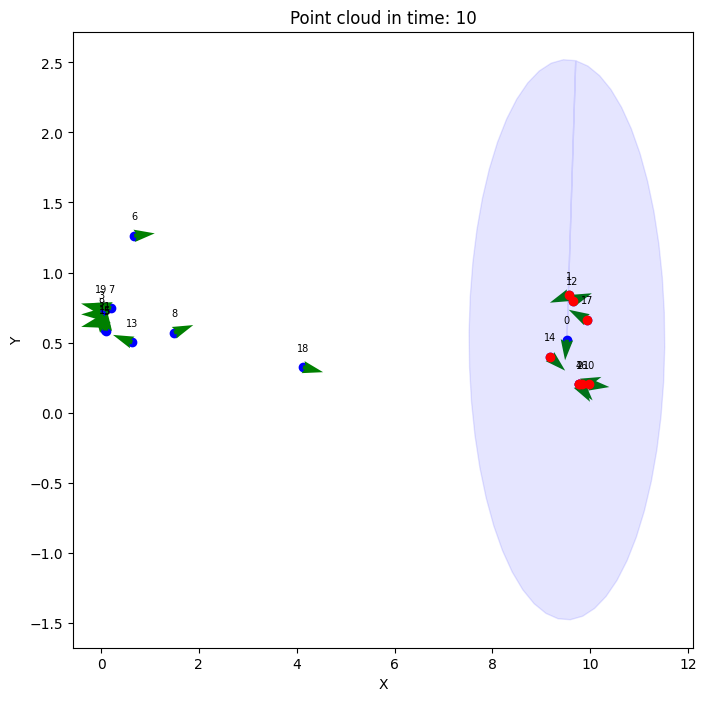

Persistent entropy: 0.819


In [13]:
time=10
robot=0
instante = ps[time]
x=instante[:,0]
y=instante[:,1]
angle=instante[:,2]
fu.dibujaNubePuntosInstante(time,robot,radio,anguloVision,ids=True)
robots=fu.calculate_robots_in_field_vision(time,robot,radio,anguloVision,printing=True)
plt.scatter(x[robots], y[robots],color="red")
plt.show()
robots.append(robot)
puntos=ps[0,robots,:2]
x=fu.calculaDiagramaPersistencia(puntos,0)
xL = DiagramSelector(use=True).fit_transform([x]) 
entropia = fu.calculaEntropia(xL[0])
print(f"Persistent entropy: {entropia}")


Time 10. Robots in the robot's 8 field of vision: [3, 5, 6, 7, 9, 11, 13, 15, 19]


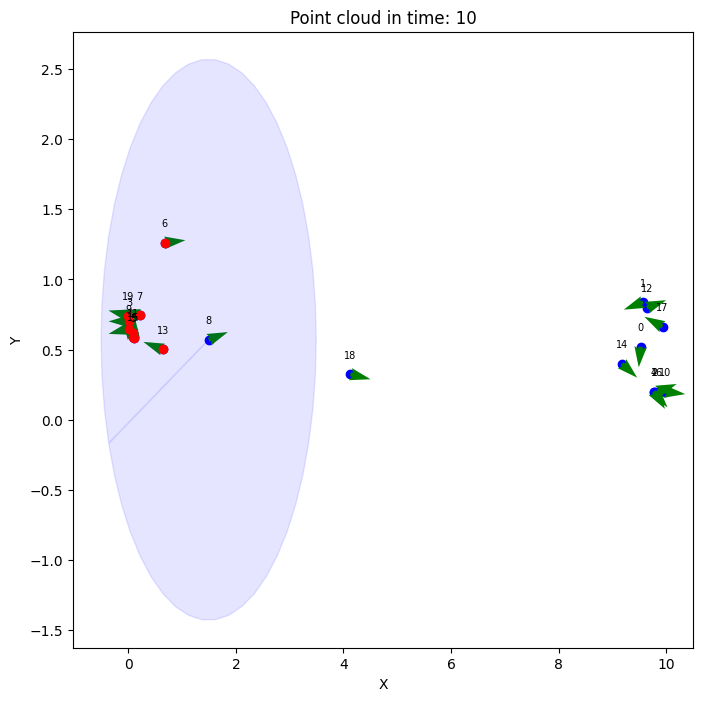

Persistent entropy: 1.2047


In [15]:
time=10
robot=8
instante = ps[time]
x=instante[:,0]
y=instante[:,1]
angle=instante[:,2]
fu.dibujaNubePuntosInstante(time,robot,radio,anguloVision,ids=True)
robots=fu.calculate_robots_in_field_vision(time,robot,radio,anguloVision,printing=True)
plt.scatter(x[robots], y[robots],color="red")
plt.show()
robots.append(robot)
puntos=ps[0,robots,:2]
x=fu.calculaDiagramaPersistencia(puntos,0)
xL = DiagramSelector(use=True).fit_transform([x]) 
entropia = fu.calculaEntropia(xL[0])
print(f"Persistent entropy: {entropia}")

Time 10. Robots in the robot's 7 field of vision: [3, 5, 6, 8, 9, 11, 13, 15, 19]


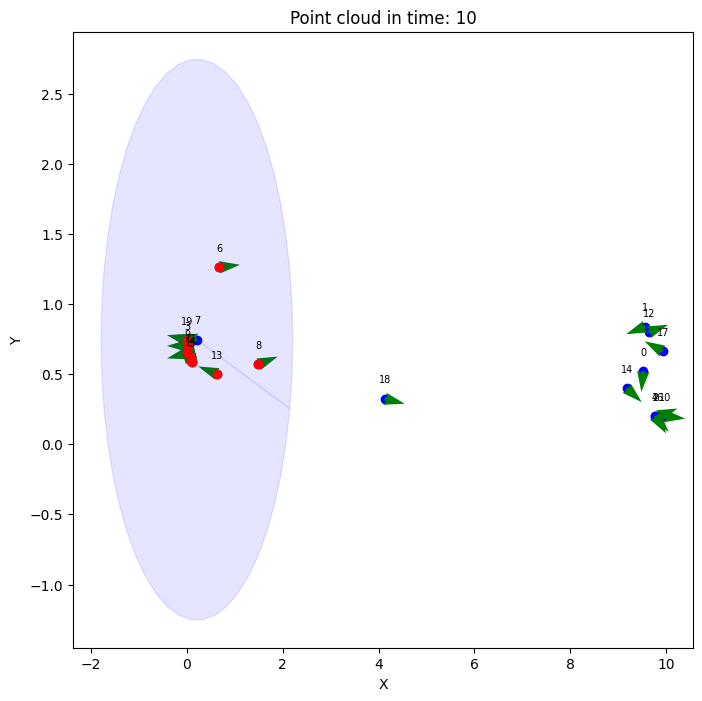

Persistent entropy: 1.2047


In [19]:
time=10
robot=7
instante = ps[time]
x=instante[:,0]
y=instante[:,1]
angle=instante[:,2]
fu.dibujaNubePuntosInstante(time,robot,radio,anguloVision,ids=True)
robots=fu.calculate_robots_in_field_vision(time,robot,radio,anguloVision,printing=True)
plt.scatter(x[robots], y[robots],color="red")
plt.show()
robots.append(robot)
puntos=ps[0,robots,:2]
x=fu.calculaDiagramaPersistencia(puntos,0)
xL = DiagramSelector(use=True).fit_transform([x]) 
entropia = fu.calculaEntropia(xL[0])
print(f"Persistent entropy: {entropia}")

We can observe how the more robots in the field of view there is a higher entropy, so a higher entropy for the field of view of a robot can mean greater difficulties to move. On the other hand, the lower the entropy the opposite, the clearer the path to where it is looking.

In [20]:
for j in range(instantes-1):
    entropiasRobots=[]
    distanceMove=[]
    for i in range(n_robots):
        time=j
        robot=i
        instante = ps[time]
        x=instante[:,0]
        y=instante[:,1]
        angle=instante[:,2]
        robots=fu.calculate_robots_in_field_vision(time,robot,radio,anguloVision)
        if len(robots) == 0:
            entropiasRobots.append(0)
        else:
            robots.append(robot)
            puntos=ps[time,robots,:2]
            x=fu.calculaDiagramaPersistencia(puntos,0)
            xL = DiagramSelector(use=True).fit_transform([x]) 
            entropia = fu.calculaEntropia(xL[0])
            entropiasRobots.append(entropia)
        time1=j
        time2=j+1
        x1=ps[time1,i,0]
        y1=ps[time1,i,1]
        x2=ps[time2,i,0]
        y2=ps[time2,i,1]
        distancia=fu.calculate_distance(x1,y1,x2,y2)
        distanceMove.append(distancia)
    corr, p_value = spearmanr(entropiasRobots, distanceMove)
    if p_value < 0.05:
        print(f"\033[92mSignificant!, correlation {corr}\033[0m")
    else:
        print(f"\033[91mNo significant, correlation {corr}\033[0m")

No significant, correlation -0.01933046138360647
No significant, correlation 0.01774540110078587
No significant, correlation -0.026336069694114637
Significant!, correlation 0.5594538195973362
Significant!, correlation 0.5367762321964072
No significant, correlation 0.1630427957223537
No significant, correlation -0.24203784259632735
No significant, correlation -0.3803258445358547
No significant, correlation -0.11741662290049838
No significant, correlation -0.09067853539404583
No significant, correlation -0.32669319919178363
No significant, correlation -0.3627141415761833
No significant, correlation -0.377664243497874
No significant, correlation -0.3934974780351356
No significant, correlation 0.07915308552295043
No significant, correlation -0.07522277121457707
No significant, correlation -0.40910848280509166
No significant, correlation 0.0781488001418956
No significant, correlation 0.27286617069723335
No significant, correlation 0.4147050558020846
No significant, correlation 0.33562176048

And if we studied the correlation depending on the number of robots in the field of view. This makes more sense since the entropy created by taking into account different numbers of points in its calculation is not comparable. **Obviously if one robots does not have any robot or only one in his field of vision it would be nan because the entropy is 0.

In [21]:
entropiasRobots=[]
distanceMove=[]
robotsVision=[]
for j in range(instantes-1):
    for i in range(n_robots):
        time=j
        robot=i
        instante = ps[time]
        x=instante[:,0]
        y=instante[:,1]
        angle=instante[:,2]
        robots=fu.calculate_robots_in_field_vision(time,robot,radio,anguloVision)
        robotsVision.append(len(robots))
        if len(robots) == 0:
            entropiasRobots.append(0)
        else:
            robots.append(robot)
            puntos=ps[time,robots,:2]
            x=fu.calculaDiagramaPersistencia(puntos,0)
            xL = DiagramSelector(use=True).fit_transform([x]) 
            entropia = fu.calculaEntropia(xL[0]) 
            entropiasRobots.append(entropia)
        time1=j
        time2=j+1
        x1=ps[time1,i,0]
        y1=ps[time1,i,1]
        x2=ps[time2,i,0]
        y2=ps[time2,i,1]
        distancia=fu.calculate_distance(x1,y1,x2,y2)
        distanceMove.append(distancia)

for i in np.unique(robotsVision):
    print(f"{i} robots in the field of vision")
    indices = np.where(np.array(robotsVision) == i)[0]
    corr, p_value = spearmanr(np.array(entropiasRobots)[indices], np.array(distanceMove)[indices])
    if p_value < 0.05:
        print(f"\033[92mSignificant!, correlation {corr}\033[0m")
    else:
        print(f"\033[91mNo significant, correlation {corr}\033[0m")

0 robots in the field of vision
No significant, correlation nan
1 robots in the field of vision
No significant, correlation nan
2 robots in the field of vision
Significant!, correlation 0.1995647143270069
3 robots in the field of vision
No significant, correlation 0.1366241220476046
4 robots in the field of vision
Significant!, correlation 0.20880386552929936
5 robots in the field of vision
Significant!, correlation 0.5566564645886957
6 robots in the field of vision
Significant!, correlation 0.5471883160919879
7 robots in the field of vision
Significant!, correlation 0.16405204006968077
8 robots in the field of vision
Significant!, correlation 0.346741978707954
9 robots in the field of vision
Significant!, correlation 0.2971809680467917
10 robots in the field of vision
Significant!, correlation 0.2306961376707573
11 robots in the field of vision
No significant, correlation -0.1982744175446186
12 robots in the field of vision
No significant, correlation 0.09698253774678693
13 robots in 

c:\Users\cimagroup\miniconda3\envs\entorno6.3\lib\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



We can see that the higher the entropy, the further the robot will move. This correlation is fulfilled by segmenting by the number of robots in the field of view, but not in a general way.

The main problem I see is that it does not know how to differentiate between robots that have all the robots at the extremes of their field of vision or very close, since if the cloud of points are similar, we will have practically similar entropy, but I understand that the robot that has the robots very close will have greater difficulties to move than the one that has them further away.

In this generate gif, we can see the path a robot takes, as well as its field of vision. We calculate his topological entropy in each time respecting the robots in his field of vision

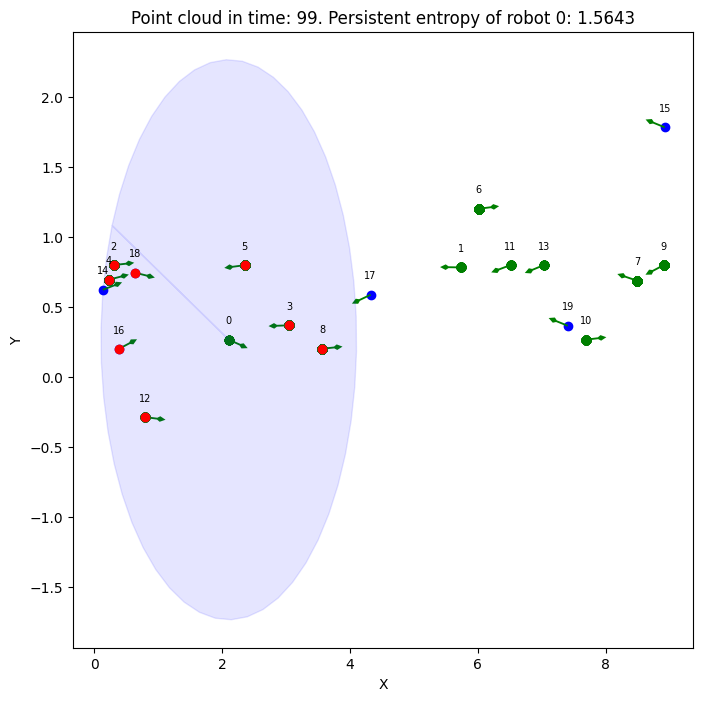

In [25]:
ids = True
robotVision = 0  #robot ID which will display his field vision

def update(frame):
    plt.clf() 
    instante = ps[frame]
    x = instante[:, 0]
    y = instante[:, 1]
    angle = instante[:, 2]

    plt.scatter(x, y, color='blue', label=f"Initial time: {frame}")
    plt.quiver(x, y, np.cos(angle), np.sin(angle), color="green", scale=30, width=0.003, headwidth=3, headlength=3)
    
    if ids:
        for i in range(len(x)):
            plt.text(x[i], y[i]+0.1, str(i), fontsize=7, ha='center', va='bottom')
    
    if robotVision is not None:
        plt.scatter(x[robotsVision], y[robotsVision],color="green")
        vision_radius = radio
        field_of_view = anguloVision
        xrobot = x[robotVision]
        yrobot = y[robotVision]
        orientation = angle[robotVision]
        arc_points = [[xrobot, yrobot]]

        num_points = 50
        for i in range(num_points + 1):
            angulos = orientation + field_of_view / 2 - (i / num_points) * field_of_view
            arc_points.append([xrobot + vision_radius * np.cos(angulos), yrobot + vision_radius * np.sin(angulos)])
        arc_points.append([xrobot, yrobot])
        arc_points = np.array(arc_points)
        # plt.plot(arc_points[:, 0], arc_points[:, 1], 'b-', alpha=0.3)
        plt.fill(arc_points[:, 0], arc_points[:, 1], color='blue', alpha=0.1)
    robots=fu.calculate_robots_in_field_vision(frame,robotVision,radio,anguloVision,)
    plt.scatter(x[robots], y[robots],color="red")
    robots.append(robotVision)
    puntos=ps[frame,robots,:2]
    x=fu.calculaDiagramaPersistencia(puntos,0)
    xL = DiagramSelector(use=True).fit_transform([x]) 
    if len(robots) < 3:
        entropia = None
    else:
        entropia = fu.calculaEntropia(xL[0])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Point cloud in time: {frame}. Persistent entropy of robot {robotVision}: {entropia}')

fig = plt.figure(figsize=(8, 8))
ani = animation.FuncAnimation(fig, update, frames=100, interval=1000)
ani.save(filename="RobotMovementVision.gif", writer="pillow")
plt.show()

 The problem is that using the alpha complex or vietoris rips does not make much sense in this case, so we will use the lower stair filtering, for this we must first, have a kind of time series of the robots in the field of view, where the x-axis is the first seen (we will use more proximity in how much angle between 0 and 180 degrees) and the y-axis the distance.

In [26]:
def transform_angle(angulo):
    if angulo < 0:
        anguloFinal = angulo + 360
    else:
        anguloFinal = angulo
    return anguloFinal

entropiasRobotsTotal=[]
distanceMoveTotal=[]
for j in range(instantes-1):
    entropiasRobots=[]
    distanceMove=[]
    for i in range(n_robots):
        time=j
        robot=i
        instante = ps[time]
        x=instante[:,0]
        y=instante[:,1]
        angle=instante[:,2]
        robots=fu.calculate_robots_in_field_vision(time,robot,radio,anguloVision)
        if len(robots) == 0:
            entropiasRobots.append(0)
            entropiasRobotsTotal.append(0)
        else:
            ids=[]
            angulos=[]
            distancias=[]
            for i in robots:
                x1=x[robot]
                y1=y[robot]
                angle1=angle[robot]
                x2=x[i]
                y2=y[i]
                angulo=np.rad2deg(fu.calculate_angle(x1,y1,angle1,x2,y2))
                anguloFinal=transform_angle(angulo)
                distancia=fu.calculate_distance(x1,y1,x2,y2)
                ids.append(i)
                angulos.append(anguloFinal)
                distancias.append(distancia)
            indices_ordenados = np.argsort(angulos)
            dgms = fu.calculate_lowerStair_PDs(np.arange(0,len(distancias)),np.array(distancias)[indices_ordenados])
            dgm0 = fu.diagram_lowerstair_dimension(dgms,0)
            maximaFiltracion=max(distancias)
            dgm0L = fu.limitaDiagrama(dgm0,maximaFiltracion)
            entropia = fu.calculaEntropia(dgm0L)
            entropiasRobots.append(entropia)
            entropiasRobotsTotal.append(entropia)

        time1=j
        time2=j+1
        x1=ps[time1,i,0]
        y1=ps[time1,i,1]
        x2=ps[time2,i,0]
        y2=ps[time2,i,1]
        distancia=fu.calculate_distance(x1,y1,x2,y2)
        distanceMove.append(distancia)
        distanceMoveTotal.append(distancia)
    corr, p_value = spearmanr(entropiasRobots, distanceMove)
    if p_value < 0.05:
        print(f"\033[92mSignificant!, correlación {corr}\033[0m")
    else:
        print(f"\033[91mNo significant, , correlación {corr}\033[0m")
corr, p_value = spearmanr(entropiasRobotsTotal, distanceMoveTotal)
if p_value < 0.05:
    print(f"\033[92mSignificant!, correlation {corr}\033[0m")
else:
    print(f"\033[91mNo significant, correlation {corr}\033[0m")

No significant, , correlación 0.11019153611156124
No significant, , correlación -0.1095890904361981
No significant, , correlación -0.11095650445414103
No significant, , correlación -0.22538733468674982
No significant, , correlación 0.3685465358307113
No significant, , correlación 0.23194062300217
No significant, , correlación nan
No significant, , correlación 0.08233546299699046
No significant, , correlación -0.21038586173727933
Significant!, correlación -0.712560049031102
No significant, , correlación 0.17241992012105795
No significant, , correlación -0.14060370383417375
No significant, , correlación -0.31099885320158016
No significant, , correlación 0.2850786782610626
Significant!, correlación -0.48004998899662793
No significant, , correlación -0.37822889793964876
No significant, , correlación -0.30645675597325023
No significant, , correlación -0.39376386840036204
No significant, , correlación -0.23017528883531285
No significant, , correlación 0.026886196715911016
No significant, , c

c:\Users\cimagroup\OneDrive - UNIVERSIDAD DE SEVILLA\Escritorio\Victor\REXASI\WP6\T6.3\Task6.3.2\CorridorScenario\functions.py:44: RuntimeWarning:

invalid value encountered in divide



No significant, , correlación 0.1175854048177278
No significant, , correlación 0.07204101273225488
No significant, , correlación 0.296053374080964
No significant, , correlación 0.18700672688140038
No significant, , correlación -0.18266105128653543
No significant, , correlación -0.25531934759180597
No significant, , correlación -0.36561727374354774
No significant, , correlación -0.0891720468758027
No significant, , correlación -0.10565773504611622
No significant, , correlación -0.05532404773765725
No significant, , correlación -0.1556244176184724
No significant, , correlación -0.3432565735254538
No significant, , correlación -0.04178190458944169
No significant, , correlación -0.3087268946362459
No significant, , correlación 0.025870722185109517
No significant, , correlación 0.051666949016453835
No significant, , correlación 0.18234515413240585
No significant, , correlación 0.05877645472083346
No significant, , correlación -0.33495770871091124
Significant!, correlación -0.534986906851032

In some instants of time there is a significant inverse relationship,but in general we can observe that there is no significant relationship between these variables.

Thus, we can say for the moment, that persistent entropy is being a good descriptor to analyse changes between consecutive time instants of point clouds and such, but not to explain the behaviour of a robot from its field of view. As next steps, we want to try to take into account other parameters beyond robot coordinates, such as orientation and velocity, to calculate persistent entropy. We will also implement other topological descriptors such as persistence landscapes and persistence images in order to explain the behaviour of the robots.